##📦 1. Install Dependencies

In [1]:
!pip install ucimlrepo xgboost shap streamlit gradio -q


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 911.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.1 MB/s eta 0:00:00


## 📥 2. Load Dataset

In [2]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets['Diabetes_binary']

# metadata
print(cdc_diabetes_health_indicators.metadata)

# variable information
print(cdc_diabetes_health_indicators.variables)

# # Load dataset
# X = cdc_diabetes_health_indicators.data.features
# y = cdc_diabetes_health_indicators.data.targets['Diabetes_binary']

# Sanity check
print("Columns in X:\n", X.columns)
print("Class distribution:\n", y.value_counts())


{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

## 🔍 3. Explore Data

In [3]:
# Class distribution
print(y.value_counts())

# Quick overview
df = pd.concat([X, y], axis=1)
df.head()


Diabetes_binary
0    218334
1     35346
Name: count, dtype: int64


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,0,11,5,4,0


## 🧪 4. Train-Test Split

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## 🧠 5. Train Models

In [5]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
# XGBoost
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:55:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

## 📊 6. Evaluation Function

In [6]:
from sklearn.metrics import classification_report, confusion_matrix

def evaluate(model, name):
    y_pred = model.predict(X_test)
    print(f"\n--- {name} ---")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

evaluate(rf, "Random Forest")
evaluate(lr, "Logistic Regression")
evaluate(xgb, "XGBoost")



--- Random Forest ---
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     43667
           1       0.49      0.18      0.26      7069

    accuracy                           0.86     50736
   macro avg       0.68      0.57      0.59     50736
weighted avg       0.82      0.86      0.83     50736

Confusion Matrix:
[[42342  1325]
 [ 5808  1261]]

--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.88      0.98      0.92     43667
           1       0.52      0.16      0.24      7069

    accuracy                           0.86     50736
   macro avg       0.70      0.57      0.58     50736
weighted avg       0.83      0.86      0.83     50736

Confusion Matrix:
[[42626  1041]
 [ 5950  1119]]

--- XGBoost ---
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     43667
           1       0.54      0.17      0.26      7069

    accuracy   

## 🔁 7. Cross-Validation

In [7]:
from sklearn.model_selection import cross_val_score

def cross_val(model, name):
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f"{name} Cross-Validation Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

cross_val(rf, "Random Forest")
cross_val(lr, "Logistic Regression")
cross_val(xgb, "XGBoost")


Random Forest Cross-Validation Accuracy: 0.8594 ± 0.0009
Logistic Regression Cross-Validation Accuracy: 0.8632 ± 0.0022


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:01:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:01:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:01:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:01:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:01:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost Cross-Validation Accuracy: 0.8656 ± 0.0003


## 🔍 8. SHAP Explainability (for XGBoost)

In [8]:
import shap
import matplotlib
matplotlib.use('Agg')  # Use non-interactive backend (important for servers/Colab)

# Create SHAP explainer for XGBoost model
explainer = shap.Explainer(xgb, X_test)
shap_values = explainer(X_test)

# Generate SHAP summary plot
shap.summary_plot(shap_values, X_test)


100%|===================| 50711/50736 [04:43<00:00]       

## 🧑‍💻 9. Simple Gradio App (for Local Prediction)

🩺 Diabetes Prediction App - Input Descriptions
Use the following options to input lifestyle, demographic, and health data for a prediction:

🔲 Checkboxes (Binary: 0 = No, 1 = Yes)
HighBP: High Blood Pressure diagnosed

HighChol: High Cholesterol diagnosed

CholCheck: Cholesterol checked in past 5 years

Smoker: Smoked 100+ cigarettes in life

Stroke: Ever had a stroke

HeartDiseaseorAttack: CHD or heart attack diagnosis

PhysActivity: Physical activity in past 30 days (non-work)

Fruits: Eat fruit 1+ times per day

Veggies: Eat vegetables 1+ times per day

HvyAlcoholConsump: Heavy alcohol consumption

AnyHealthcare: Has health insurance or coverage

NoDocbcCost: Could not see doctor due to cost in last year

DiffWalk: Serious difficulty walking/climbing stairs

Sex: 0 = Female, 1 = Male

🔢 Numeric Inputs
BMI: Body Mass Index (e.g., 22-50)

GenHlth: General health (1 = Excellent to 5 = Poor)

MentHlth: Days mental health was not good (0-30)

PhysHlth: Days physical health was not good (0-30)

Age: Age group

1 = 18-24

2 = 25-29

…

13 = 80+

🎓 Education Level (1-6)
1 = Never attended school

2 = Grades 1-8

3 = Grades 9-11

4 = Grade 12 or GED

5 = College 1-3 years

6 = College 4+ years

💰 Income Level (1-8)
1 = Less than $10,000

2 = $10,000-14,999

3 = $15,000-19,999

4 = $20,000-24,999

5 = $25,000-34,999

6 = $35,000-49,999

7 = $50,000-74,999

8 = $75,000 or more

In [19]:
# import gradio as gr

# def predict_diabetes(HighBP, HighChol, CholCheck, BMI, Smoker, Stroke, HeartDiseaseorAttack,
#                      PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare,
#                      NoDocbcCost, GenHlth, MentHlth, PhysHlth, DiffWalk, Sex, Age,
#                      Education, Income):

#     input_data = pd.DataFrame([[
#         HighBP, HighChol, CholCheck, BMI, Smoker, Stroke, HeartDiseaseorAttack,
#         PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare,
#         NoDocbcCost, GenHlth, MentHlth, PhysHlth, DiffWalk, Sex, Age,
#         Education, Income
#     ]], columns=X.columns)

#     prediction = xgb.predict(input_data)[0]
#     return "Diabetic / Prediabetic" if prediction == 1 else "Healthy"

# inputs = [
#     gr.Checkbox(label=col) if X[col].nunique() == 2 else gr.Slider(minimum=int(X[col].min()), maximum=int(X[col].max()), step=1, label=col)
#     for col in X.columns
# ]

# gr.Interface(fn=predict_diabetes, inputs=inputs, outputs="text", title="Diabetes Risk Classifier").launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://04988484b9d2f742bd.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## Presentation Diagrams!

## ✅ Step 0: Store Predictions and Probabilities
Add this new cell after model training, before plotting.

In [17]:
from sklearn.utils.extmath import softmax
from sklearn.linear_model import LogisticRegression
import numpy as np

models = {
    'Random Forest': rf,
    'Logistic Regression': lr,
    'XGBoost': xgb
}

# Store predictions and probabilities
predictions = {}
probabilities = {}

for name, model in models.items():
    predictions[name] = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        probabilities[name] = model.predict_proba(X_test)[:, 1]
    else:
        # fallback if using decision_function
        prob = model.decision_function(X_test)
        probabilities[name] = softmax(np.vstack([1 - prob, prob]).T)[:, 1]


## 📊 1. Confusion Matrix

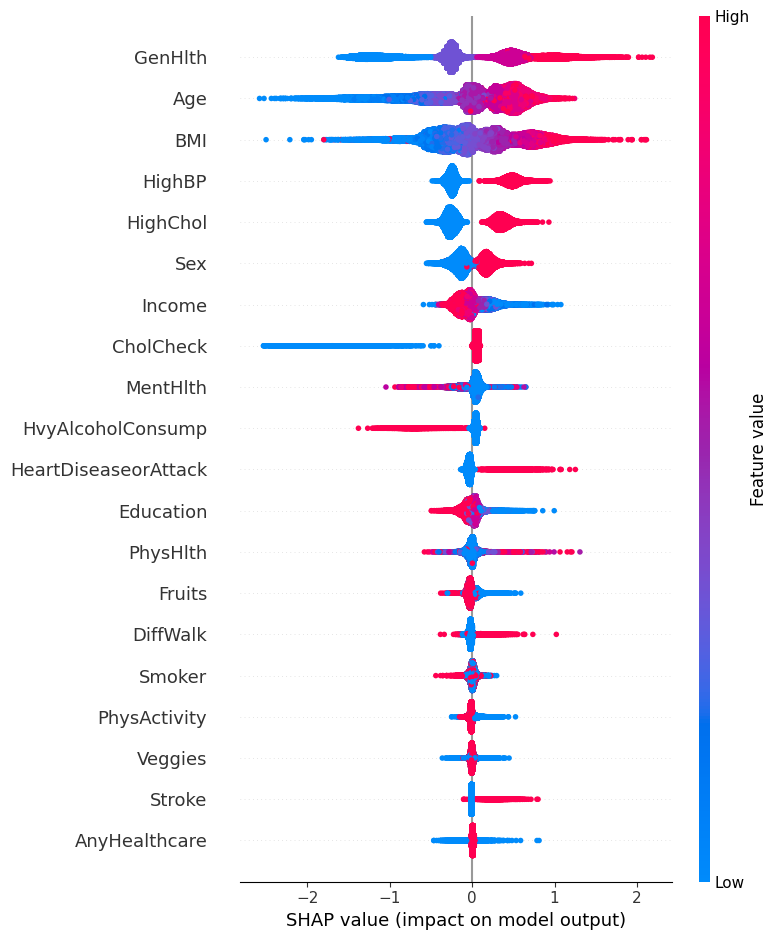

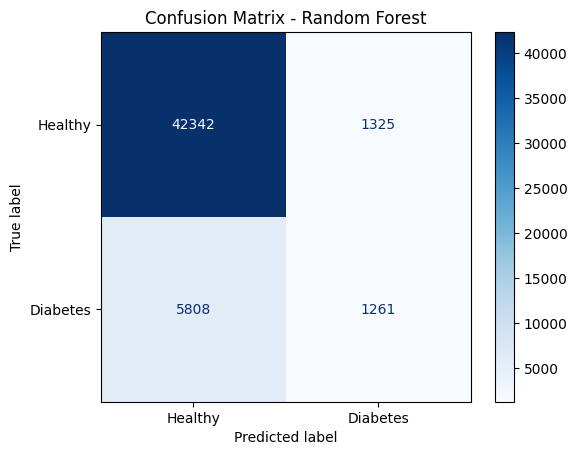

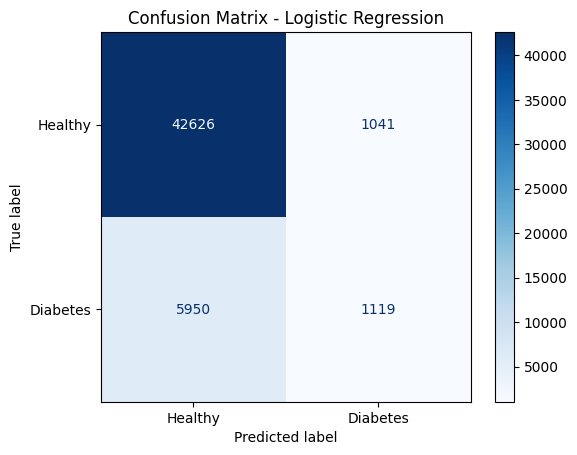

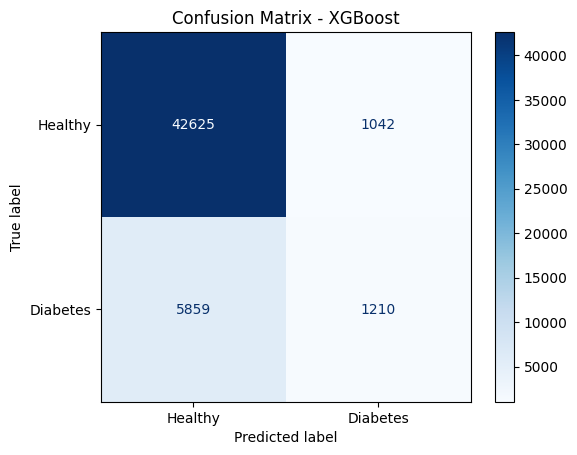

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('module://matplotlib_inline.backend_inline')  # ensure inline backend

for name in models:
    cm = confusion_matrix(y_test, predictions[name])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Healthy', 'Diabetes'])
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()



## 📈 2. ROC Curve (Receiver Operating Characteristic)

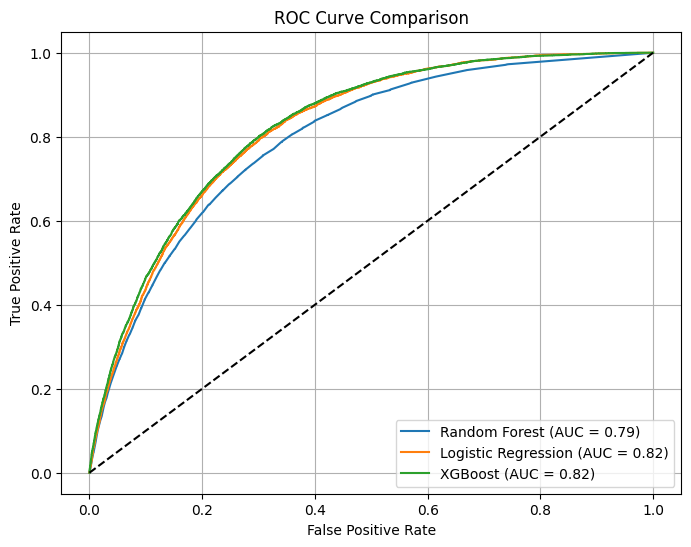

In [19]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 6))
for name in models:
    fpr, tpr, _ = roc_curve(y_test, probabilities[name])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid()
plt.show()


## 🔍 3. Precision-Recall (PR) Curve

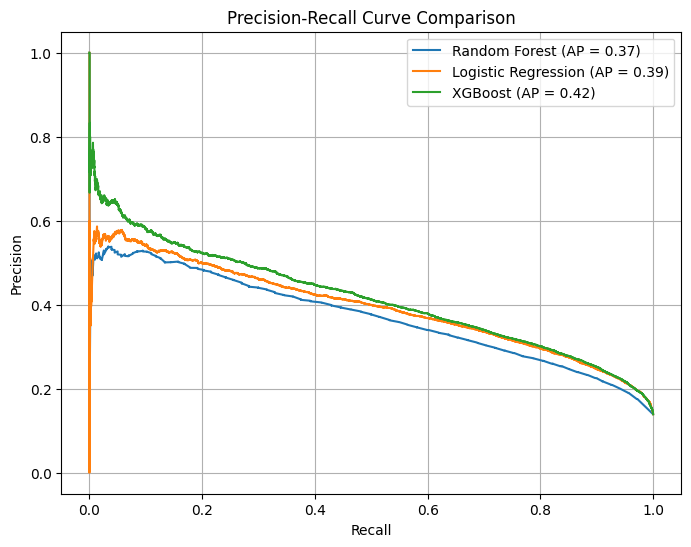

In [20]:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(8, 6))
for name in models:
    precision, recall, _ = precision_recall_curve(y_test, probabilities[name])
    ap = average_precision_score(y_test, probabilities[name])
    plt.plot(recall, precision, label=f"{name} (AP = {ap:.2f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Comparison")
plt.legend()
plt.grid()
plt.show()


## ⚖️ 4. Probability Calibration Curve

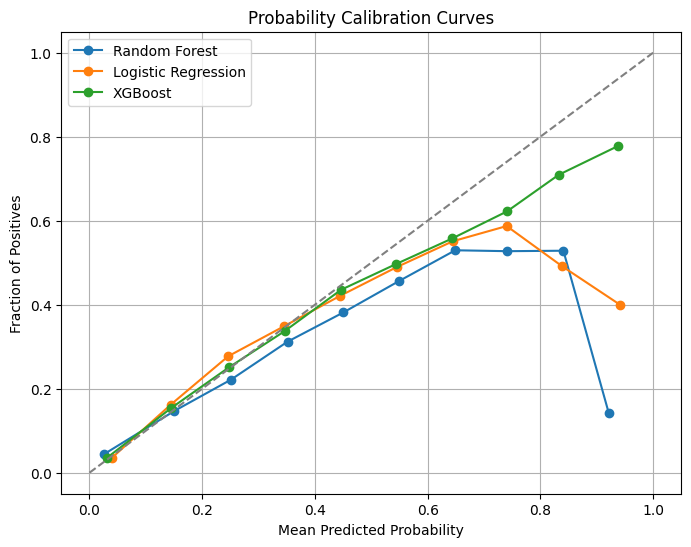

In [21]:
from sklearn.calibration import calibration_curve

plt.figure(figsize=(8, 6))
for name in models:
    prob_true, prob_pred = calibration_curve(y_test, probabilities[name], n_bins=10)
    plt.plot(prob_pred, prob_true, marker='o', label=name)

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("Mean Predicted Probability")
plt.ylabel("Fraction of Positives")
plt.title("Probability Calibration Curves")
plt.legend()
plt.grid()
plt.show()


## 💡 5. Feature Importance Plot (XGBoost built-in)

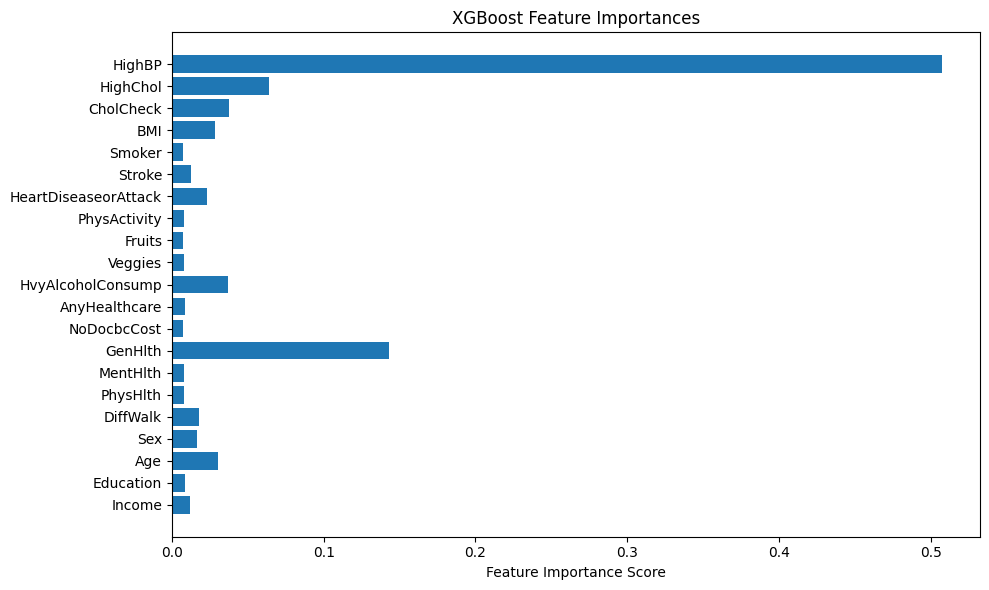

In [14]:
importances = xgb.feature_importances_
features = X_train.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel('Feature Importance Score')
plt.title('XGBoost Feature Importances')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


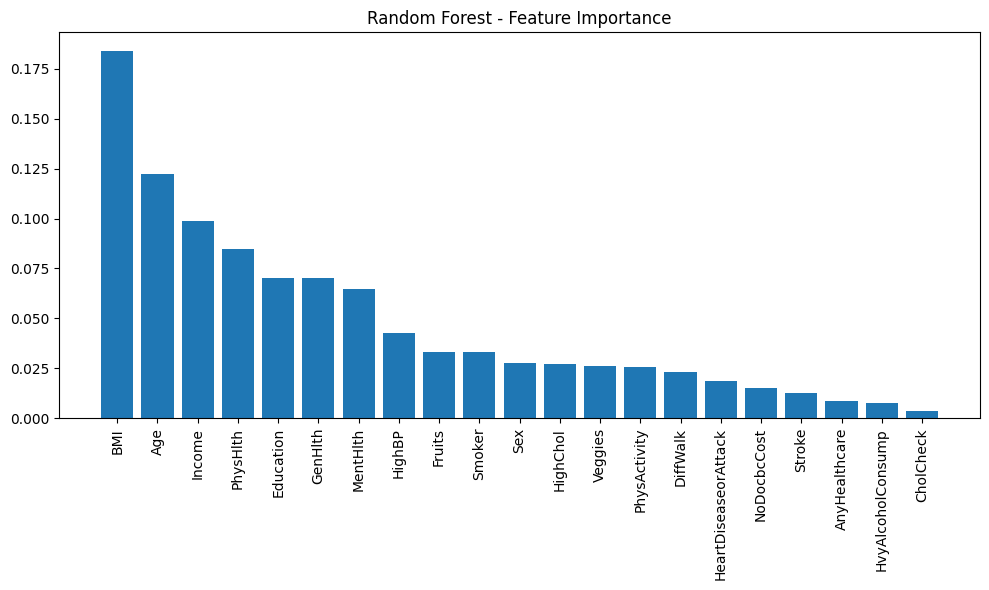

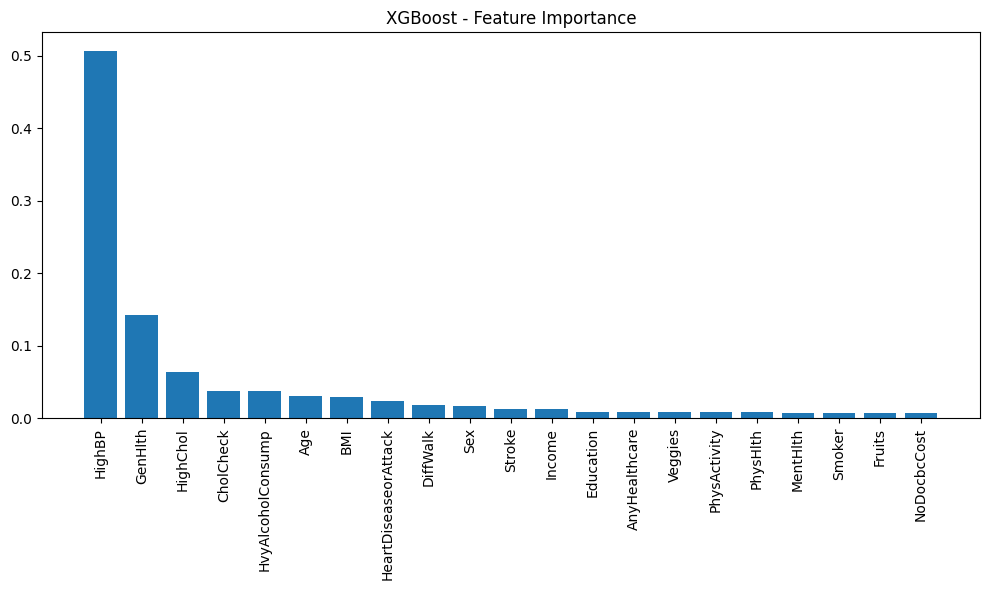

In [23]:
def plot_feature_importance(model, model_name):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    features = X.columns[indices]

    plt.figure(figsize=(10, 6))
    plt.bar(range(len(importances)), importances[indices])
    plt.xticks(range(len(importances)), features, rotation=90)
    plt.title(f"{model_name} - Feature Importance")
    plt.tight_layout()
    plt.show()

plot_feature_importance(rf, "Random Forest")
plot_feature_importance(xgb, "XGBoost")


# # 2. SHAP Summary Plot
# explainer = shap.TreeExplainer(xgb)
# shap_values = explainer.shap_values(X_test)
# shap.summary_plot(shap_values, X_test)  # This will work correctly now


## 🧠 6. SHAP Summary Plot

100%|===================| 50605/50736 [04:39<00:00]       

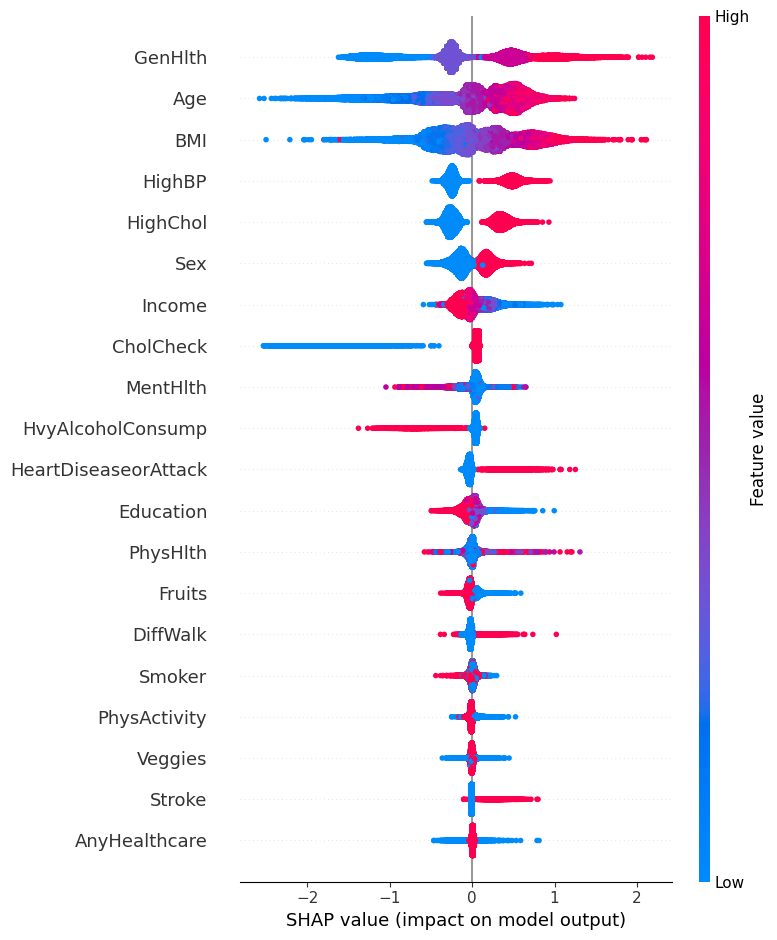

In [24]:
# import shap
# import matplotlib
# matplotlib.use('Agg')  # Use non-interactive backend (important for servers/Colab)

# # Create SHAP explainer for XGBoost model
# explainer = shap.Explainer(xgb, X_test)
# shap_values = explainer(X_test)

# # Generate SHAP summary plot
# shap.summary_plot(shap_values, X_test)

import shap
explainer = shap.Explainer(xgb, X_test)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)



## 🧪 7. Decision Curve Analysis (Optional)

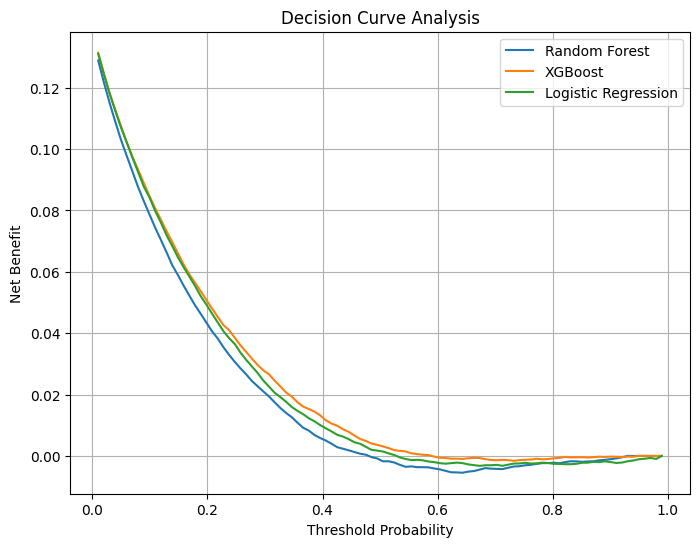

In [25]:
def decision_curve(model, name):
    thresholds = np.linspace(0.01, 0.99, 100)
    net_benefits = []
    y_prob = model.predict_proba(X_test)[:, 1]

    for thresh in thresholds:
        tp = np.sum((y_prob >= thresh) & (y_test == 1))
        fp = np.sum((y_prob >= thresh) & (y_test == 0))
        n = len(y_test)
        nb = (tp / n) - (fp / n) * (thresh / (1 - thresh))
        net_benefits.append(nb)

    plt.plot(thresholds, net_benefits, label=name)

plt.figure(figsize=(8, 6))
decision_curve(rf, "Random Forest")
decision_curve(xgb, "XGBoost")
decision_curve(lr, "Logistic Regression")
plt.xlabel("Threshold Probability")
plt.ylabel("Net Benefit")
plt.title("Decision Curve Analysis")
plt.legend()
plt.grid()
plt.show()


## 📊 8. Performance Comparison Table

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

performance = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    performance.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, y_prob)
    })

perf_df = pd.DataFrame(performance).set_index("Model").round(4)
perf_df


,Accuracy,Precision,Recall,F1 Score,AUC
Model,,,,,
Random Forest,0.8594,0.4876,0.1784,0.2612,0.7944
Logistic Regression,0.8622,0.5181,0.1583,0.2425,0.8192
XGBoost,0.8640,0.5373,0.1712,0.2596,0.8241
